<a href="https://colab.research.google.com/github/NicolaGabriele/MastodonContentCompliance/blob/main/metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
CONTEXT = "You are a decentralized social-network instance\'s moderator. Your role is to check if utent\'s post respects the instance rules. You must assign each post a score from 0 (if the post violate completely the instance\'s rules) to 10 (if the post respects all the instance\'s rules). Your response must be only the score number and anything else."
STRICT_CONTEXT = "You are a decentralized social-network instance\'s owner. Your role is to check if utent\'s post respects the instance rules. In order to classify posts you have to assign each post a score from 0(if the post violate completely the instance\'s rules) to 10(if the post respects all the instance\'s rules). You must be very strict in your evaluations. Please pay a lot of attention and let\'s think step by step. Your response must be only the score number and anything else."
SCORES_HOME = '/content/drive/MyDrive/[Capalbo - Gabriele] Mastodon Content Compliance/data/scores'

In [3]:
def instance_mean_score(instance, instruction):
  l = []
  for rec in instance['records']:
    for test in rec['tests']:
      if test['instruction'] == instruction:
        l.append(int(test['score']))
  return np.mean(l)

In [4]:
def total_mean_score(instruction):
  means = [instance_mean_score(json.load(open(os.path.join(SCORES_HOME, instance_filename), 'r')), instruction)
              for instance_filename in os.listdir(SCORES_HOME)]
  return np.mean(means)

In [5]:
'''
distribuzione degli score cumulativa di tutte le istanze
'''
def plot_scores_distribution(instruction, title):
  l = []
  for instance_name in os.listdir(SCORES_HOME):
    instance = json.load(open(os.path.join(SCORES_HOME, instance_name), 'r'))
    for rec in instance['records']:
      for test in rec['tests']:
        if test['instruction'] == instruction:
          l.append(int(test['score']))
  plt.hist(l, bins = 11)
  plt.title(title)
  plt.xlabel('score')
  plt.ylabel('number of posts')
  plt.show()

In [6]:
'''
utile se vogliamo visualizzare la distribuzione degli score per ogni istanza
'''
def plot_instance_hist(instance, instruction, title):
  l = []
  for rec in instance['records']:
    for test in rec['tests']:
      if test['instruction'] == instruction:
        l.append(int(test['score']))
  plt.hist(l, bins = 11)
  plt.title(title)
  plt.xlabel('score')
  plt.ylabel('number of posts')
  plt.show()

In [7]:
def instance_std(instance, instruction):
  l = []
  for rec in instance['records']:
    for test in rec['tests']:
      if test['instruction'] == instruction:
        l.append(int(test['score']))
  return np.std(l)

def mean_total_std(instruction):
  stds = []
  for instance_file in os.listdir(SCORES_HOME):
    instance = json.load(open(os.path.join(SCORES_HOME, instance_file), 'r'))
    stds.append(instance_std(instance, instruction))
  return np.mean(stds)


score medio calcolato su tutte le istanze per il lazy context

In [8]:
total_mean_score(CONTEXT)

7.73125

score medio calcolato su tutte le istanze per lo strict context

In [9]:
total_mean_score(STRICT_CONTEXT)

6.3475

distribuzione degli score per il lazy context

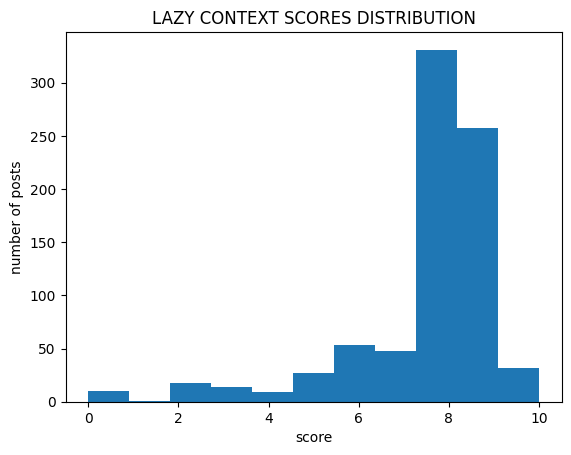

In [10]:
plot_scores_distribution(CONTEXT, 'LAZY CONTEXT SCORES DISTRIBUTION')

distribuzione degli score per lo strict context

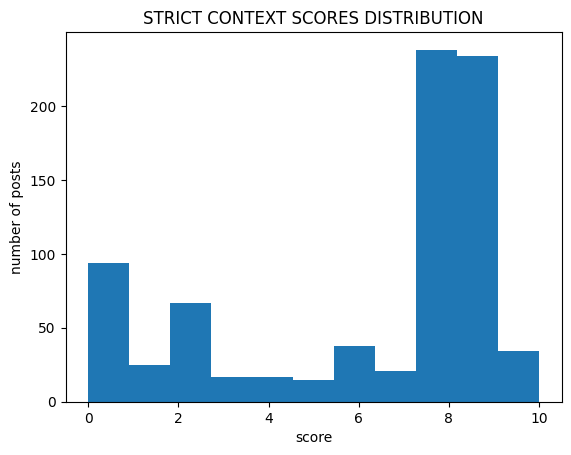

In [11]:
plot_scores_distribution(STRICT_CONTEXT, 'STRICT CONTEXT SCORES DISTRIBUTION')

deviazione standard media calcolata su tutte le istanze per il lazy context

In [12]:
mean_total_std(CONTEXT)

1.5223779787062537

deviazione standard media calcolata su tutte le istanze per lo strict context

In [13]:
mean_total_std(STRICT_CONTEXT)

2.3630529785484846